In [3]:
import pandas as pd

In [2]:
!python -V

Python 3.11.5


In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.metrics import root_mean_squared_error

In [7]:
# List files in the directory
!ls

data  duration-prediction.ipynb  howToReadParquetFile.ipynb


In [8]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_parquet(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [9]:
# Reading the parquet file
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

In [10]:
len(df_train), len(df_val)

(3009173, 2855951)

In [32]:
categorical = ['PULocationID','DOLocationID']

In [33]:
df_train.loc[:, categorical] = df_train[categorical].astype(str)

In [34]:
df_val.loc[:, categorical] = df_val[categorical].astype(str)

In [35]:
df_train[categorical].astype(str).dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [ ]:
categorical = ['PULocationID','DOLocationID']

In [36]:
categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [37]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.811818410552807

In [16]:
# Q1. Downloading the data
# Read the data for January. How many columns are there?

num_columns = len(df_train.columns)
print(f'The answer is {num_columns} columns')

The answer is 21 columns


In [13]:
# Q2. Computing duration
# Now let's compute the duration variable. It should contain the duration of a ride in minutes.
# What's the standard deviation of the trips duration in January?

# Transformantion DIFF minutes between the datetime
df_january['duration'] = df_january.tpep_dropoff_datetime - df_january.tpep_pickup_datetime
df_january.duration = df_january.duration.apply(lambda td: td.total_seconds() / 60)

In [14]:
df_january

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [15]:
df_january.duration.describe(percentiles=[0.95,0.98,0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [16]:
standard_deviation = df_january['duration'].std()

In [17]:
print("Standard deviation:", round(standard_deviation, 2))

Standard deviation: 42.59


In [ ]:
# Q3. Dropping outliers
# Next, we need to check the distribution of the duration variable. 
# There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
# What fraction of the records left after you dropped the outliers?

In [18]:
((df_january.duration >= 1) & (df_january.duration <= 60)).mean()

0.9812202822125979

In [20]:
df_january_filtered = df_january[((df_january.duration >= 1) & (df_january.duration <= 60))]

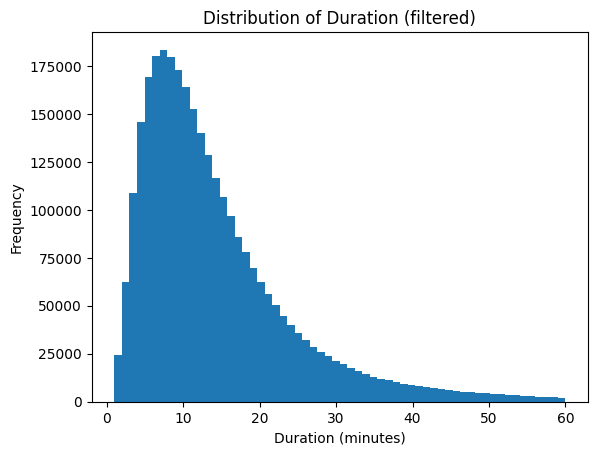

In [21]:
plt.hist(df_january_filtered['duration'], bins=60)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (filtered)')
plt.show()

In [22]:
n_original = len(df_january)
n_filtered = len(df_january_filtered)

fraction_left = ((n_filtered / n_original) * 100)

print(f'Fraction of records left: {fraction_left:.0f}%')

Fraction of records left: 98%


In [ ]:
# Q4. One-hot encoding

# Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

# Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
# Fit a dictionary vectorizer
# Get a feature matrix from it
# What's the dimensionality of this matrix (number of columns)?

In [23]:
df_january_filtered

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [24]:
categorical = ['PULocationID','DOLocationID']

In [25]:
df_january_filtered[categorical].astype(str).dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [29]:
df_january_filtered.loc[:, categorical] = df_january_filtered[categorical].astype(str)

In [27]:
df_train.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
PU_DO                            object
dtype: object

In [29]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [30]:
X_train

<3009173x21801 sparse matrix of type '<class 'numpy.float64'>'
	with 3009173 stored elements in Compressed Sparse Row format>

In [40]:
print(f' The number of columns in this matrix is {X_train.shape[1]} columns')

 The number of columns in this matrix is 515 columns


In [ ]:
dv.feature_names_

In [36]:
target = 'duration'
y_train = df_january_filtered[target].values

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

LinearRegression()

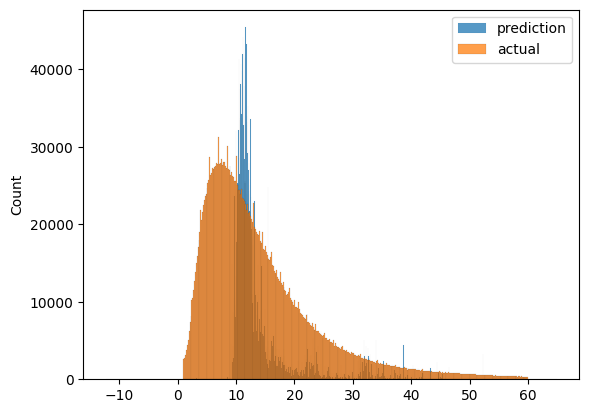

In [56]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

In [39]:
# Q5. Training a model

# Now let's use the feature matrix from the previous step to train a model.

# Train a plain linear regression model with default parameters
# Calculate the RMSE of the model on the training data
# What's the RMSE on train?

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

In [ ]:
# Q6. Evaluating the model

# Now let's apply this model to the validation dataset (February 2023).

# What's the RMSE on validation?

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)